<a href="https://colab.research.google.com/github/LeeSeungwon89/Python_for_Data_Analytics_Science/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%9E%85%EC%B6%9C%EB%A0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 입출력 심화**

데이터 입출력은 전 챕터인 **2. 데이터를 다루기 위한 파이썬 패키지**에서 약간 다뤘습니다. 이번 챕터에서는 좀 더 다양한 파일 형식을 다루는 법을 정리하겠습니다. **데이터 분석을 위한 파이썬 철저 입문(최은석, 위키북스)**, **파이썬 머신러닝 판다스 데이터 분석(오승환, 정보문화사)**을 참고했습니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/Python_for_Data_Analytics_Science

/content/gdrive/MyDrive/Python_for_Data_Analytics_Science


In [ ]:
import pandas as pd

## **1.1. CSV**

### **1.1.1. 파일 읽기**

`read_csv()` 메서드로 `csv` 파일을 읽습니다. 매개변수 `header`에 행 번호를 인자로 전달하면 해당하는 행을 열명으로 지정합니다. 기본값은 `0`이며 첫 번째 행을 열명으로 삼습니다. 아래에서 예시하겠습니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/read_csv_sample.csv'
pd.read_csv(file_path)

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
pd.read_csv(file_path, header=1)

,0,1,4,7
0,1,2,5,8
1,2,3,6,9


`header=None`으로 지정하면 열로 지정되지 않습니다.

In [ ]:
pd.read_csv(file_path, header=None)

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


매개변수 `index_col`의 기본값은 `None`입니다. 인덱스로 컬럼을 지정하지 않았다는 의미입니다.

In [ ]:
pd.read_csv(file_path, index_col=None)

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


`index_col` 매개변수에 'c1' 열을 전달하겠습니다.

In [ ]:
pd.read_csv(file_path, index_col=['c1'])

,c0,c2,c3
c1,,,
1,0,4,7
2,1,5,8
3,2,6,9


다중으로 전달할 수도 있습니다.

In [ ]:
pd.read_csv(file_path, index_col=['c1', 'c0'])

,,c2,c3
c1,c0,,
1,0,4,7
2,1,5,8
3,2,6,9


몇 가지 주요 매개변수에 대한 목록은 아래와 같습니다.

- `sep` or `delimiter`: 각각 데이터를 구분한 구분자를 전달합니다.

- `names`: 열명으로 사용할 문자열 리스트를 전달합니다.

- `skiprows`: 처음 몇 줄을 스킵할 것인지 설정합니다. 예컨대 `[0, 1]`로 지정하면 0행과 1행은 출력하지 않습니다.

- `parse_dates`: 날짜 텍스트를 `datatime64` 형으로 바꿀지 설정합니다. 기본값은 `False`입니다.

- `skip_footer`: 마지막 몇 줄을 스킵할 것인지 설정합니다.

- `encoding`: 텍스트 인코딩 유형을 지정합니다.

### **1.1.2. 파일 저장하기**

`to_csv()` 메서드로 `csv` 파일로 저장할 수 있습니다.

In [ ]:
csv_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_csv = pd.DataFrame(csv_data)
df_csv

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


인덱스를 'name'으로 지정하겠습니다.

In [ ]:
df_csv.set_index('name', inplace=True)
df_csv

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


`csv` 파일로 저장하겠습니다. `sep` 매개변수에 구분자를 공백(`' '`)으로 지정하고 `encoding` 매개변수에 문자형을 `'cp949'`로 지정하겠습니다.

In [ ]:
df_csv.to_csv('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_csv2.csv',
              sep=',', encoding='cp949')

## **1.2. 엑셀**

### **1.2.1. 파일 읽기**

`read_excel()` 메서드는 `read_csv()` 메서드와 사용법이 거의 같으며 모든 매개변수를 동일하게 가지고 있습니다. `engine` 매개변수의 경우 `xlsx` 파일이면 `openpyxl`을 인자로 지정하고, `xls` 파일이면 `xlrd`를 인자로 지정합니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/남북한발전전력량.xlsx'
pd.read_excel(file_path, engine='openpyxl')

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,2852,3065,3225,3421,3646,3812,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,61,61,56,42,53,69,59,52,52,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,1195,1302,1518,1689,1821,1859,2056,2127,2272,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,897,1031,1090,1121,1191,1297,1307,1468,1487,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,102,103,102,106,106,117,125,131,126,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,68,83,92,96,84,79,81,84,99,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


이번에는 직접 생성한 엑셀 파일의 두 번째 시트인 '3월 판매량'을 읽겠습니다. `sheet_name` 매개변수에 `시트 순서 - 1`인 `1`로 지정하거나 시트명인 `'3월 판매량'`을 지정합니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/직원별 판매량.xlsx'
pd.read_excel(file_path, sheet_name=1)

,성명,마우스,키보드,모니터,스피커
0,임정섭,63,72,37,83
1,박종인,48,11,54,21
2,강원희,69,32,46,24
3,최중규,68,27,23,52
4,이한정,84,57,16,85


### **1.2.2. 파일 저장하기**

`to_excel()` 메서드를 사용하면 엑셀 파일로 저장합니다. `csv` 파일과 같은 방식으로 적용하겠습니다.

In [ ]:
excel_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_excel = pd.DataFrame(excel_data)
df_excel

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


In [ ]:
df_excel.set_index('name', inplace=True)
df_excel

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
df_excel.to_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_excel.xlsx')

여러 데이터프레임을 엑셀 파일 하나에 저장할 수 있습니다. 먼저 데이터프레임을 두 개 만들겠습니다.

In [ ]:
excel_data1 = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}

excel_data2 = {'c0': [1, 2, 3],
               'c1': [4, 5, 6],
               'c2': [7, 8, 9],
               'c3': [10, 11, 12],
               'c4': [13, 14, 15]}

df1_excel = pd.DataFrame(excel_data1)
df1_excel.set_index('name', inplace=True)

df2_excel = pd.DataFrame(excel_data2)
df2_excel.set_index('c0', inplace=True)

두 데이터프레임을 두 시트에 각각 저장하겠습니다.

In [ ]:
test_excelwriter = pd.ExcelWriter('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/excelwriter.xlsx')
df1_excel.to_excel(test_excelwriter, sheet_name='sheet1')
df2_excel.to_excel(test_excelwriter, sheet_name='sheet2')
test_excelwriter.save()

### **1.2.3. 파일 통합하기**

엑셀 파일의 개수가 적으면 엑셀 파일을 수작업으로 통합하기 수월하지만 개수가 많으면 쉽지 않습니다. 파이썬을 사용하면 파일 개수가 많더라도 손쉽게 통합할 수 있습니다. 아래는 데이터를 효율적으로 처리하기 위해 데이터를 생성할 때 신경써야 할 몇 가지 요소입니다. 엑셀을 포함하여 다른 모든 형식의 데이터 파일에도 적용됩니다. 

- 열 머리글(header)은 한 줄로 만듭니다.

- 열 머릿글과 데이터 입력 부분에 셀을 병합하지 않습니다.

- 셀 하나에 숫자와 단위를 함께 쓰지 않습니다.

- 열 하나에 입력한 데이터 형식은 모두 같아야 합니다.

- 데이터를 여러 시트로 나누지 않고 최대한 한 시트에 넣습니다.

아래 예시를 통해 파일을 통합하는 과정을 살피겠습니다. 먼저 임의로 생성한 파일을 리스트로 묶고 객체로 넘깁니다.

In [ ]:
ex_f = ['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
        '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
        '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

빈 데이터프레임 객체를 생성하고, `excel_files` 객체의 엑셀 파일을 하나씩 꺼내서 엑셀로 읽습니다. 그리고 빈 데이터프레임에 `append()` 메서드로 엑셀 파일을 하나씩 추가합니다.

In [ ]:
df_all_ex_f1 = pd.DataFrame()

for i in ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f1 = df_all_ex_f1.append(df_ex_f)

df_all_ex_f1

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
0,사과,유지민,중,62,93,60
1,딸기,유지민,상,52,41,45
2,포도,유지민,상,46,37,8
0,사과,이승원,중,39,67,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


인덱스가 오름차순으로 부여되지 않았습니다. 매개변수를 `ignore_index=True`로 지정하겠습니다.

In [ ]:
df_all_ex_f2 = pd.DataFrame()

for i in ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f2 = df_all_ex_f2.append(df_ex_f, ignore_index=True)

df_all_ex_f2

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


해당 파일은 3개뿐이므로 개별적으로 입력하기 쉽지만 파일 수가 많으면 간단치 않습니다. 여러 파일의 이름을 위 파일들의 이름처럼 같은 형식으로 통일하고(이름만 다르게 하고) 한꺼번에 여러 파일을 가져오려면 [`glob`](https://docs.python.org/ko/3/library/glob.html?highlight=glob#module-glob) 모듈을 활용합니다. `glob` 모듈은 `*`과 `?`를 사용하여 문자열을 긁어옵니다. 와일드카드라고 불리우는 이 기호 중에 `*`은 길이와 무관하게 모든 문자열을 의미하고, `?`는 한 글자로 된 모든 문자열을 의미합니다.

아래는 이 모듈에 대한 예시입니다. 

In [ ]:
import glob

# `glob` 모듈의 `glob` 클래스를 부릅니다.
# 주소는 그대로 나열하고 '*'를 사용하여 모든 문자열을 가져옵니다.
glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

위 코드를 사용하여 데이터프레임 하나로 합치겠습니다.

In [ ]:
glob_ex_f = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')

df_all_ex_f3 = pd.DataFrame()

for i in glob_ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f3 = df_all_ex_f3.append(df_ex_f, ignore_index=True)

df_all_ex_f3

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


통합한 데이터프레임을 엑셀 파일로 저장하겠습니다.

In [ ]:
# 파일명 객체를 만듭니다.
ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx'
# `ExcelWriter()` 객체를 만듭니다.
ex_total_file_writer = pd.ExcelWriter(ex_file_name)
# 데이터프레임 객체를`to_excel(`ExcelWriter()` 객체)`로 엑셀화합니다.
df_all_ex_f3.to_excel(ex_total_file_writer, index=False, sheet_name='수확량_통합_최종')
# 최종적으로 저장합니다.
ex_total_file_writer.save()

glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx')

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx']

### **추가. 정규 표현식**

만약 파일명이 통일되지 않았거나 파일 수가 많아서 모든 파일명을 통일하기 어렵다면 [`re`](https://docs.python.org/ko/3/library/re.html#) 모듈로 [정규 표현식](https://docs.python.org/ko/3/howto/regex.html)을 활용할 수 있습니다. 정규 표현식은 매우 중요한 개념이므로 추가 파트를 만들었습니다.

정규 표현식이란 규칙을 지닌 문자열 집합을 표현하는 데 사용하는 형식 언어이며, 문자열 검색과 치환 용도로 활용됩니다.

정규 표현식에 사용하는 기호를 [메타문자](https://naudhizb.tistory.com/857)라고 부릅니다. POSIX의 정규 표현식과 POSIX 정규 표현식에서 확장된 Perl 방식의 PCRE가 대표적인 정규 표현식입니다. 이외에도 여러 정규 표현식이 있고 차이점도 존재하지만 대체적으로 비슷한 형식입니다.

아래는 몇 가지 정규 표현식 방법입니다. 먼저 [메타문자 예시](https://codetorial.net/python/regular_expression/regex_metacharacters.html)를 살펴보는 편이 좋습니다. 아래 예시는 `findall()` 메서드에 기반합니다.

- `\`: 앞에 오는 문자를 특수 문자, 리터럴, 역참조, 8진수 이스케이프로 표현합니다.
  - `\\`: **\**
  - `\}`: **}**

- `^x`: x의 시작 부분에서 위치를 찾습니다.
  - `^ab`: **a**bcde

- `x$`: x의 끝 부분에서 위치를 찾습니다.
  - `e$`: cak**e**

- `x{n}`: x를 n번만큼 반복합니다. `{n,}`는 n번 이상 반복합니다.
  - `ca{3}n`: **caaan**

- `x{n, m}`: x를 n과 m 사이만큼 반복합니다.
  - `ca{2, 3}n`: **caan**, **caaan**

- `x*` == `x{0,}`: x를 0개 이상 찾습니다.
  - `ab*`: **ab**, **aaabb**, **abbb**
  - `ab*c`: **abc**, **ac**, **aabbbc**

- `x+` == `x{1,}`: x를 1개 이상 찾습니다.
  - `Le+`: **Le**, **Lee**, **Leee**

- `x?` == `x{0, 1}`: x를 0개나 1개만큼 찾습니다.
  - `ca?n`: **can**, **cn**

- `.`: 줄바꿈 문자를 제외한 모든 문자입니다.
  - `.n`: **an** egg, **in** a box
  - `.*`: 아무 문자도 없거나 임의의 문자가 1회 이상 반복되는 문자열을 찾습니다.
  - `^ab.*`: ab로 시작(`^`)하는 모든 문자열을 찾습니다.
  - `.+`: 모든 문자열을 찾습니다.
  - `r.*e`: r로 시작하고 e로 끝나는 임의의 문자열을 찾습니다.
  - `ab.`: ab로 시작하는 모든 세 문자를 찾습니다.

- `(x)`: x를 체크하고, 체크한 값을 변수로 저장합니다.
  - `(b..)(a..)`: **box**, **ace**

- `(?:x)`: x를 체크하고, 체크한 값을 변수로 저장하지 않습니다.
  - `(?:b..)(a..)`: **ace**

- `x(?=y)`: x와 일치한 y의 시작 위치에서 검색할 문자열을 찾습니다.
  - `amazing(?=grace|star)`: **amazinggrace**, **amazingstar**

- `x(?!y)`: x와 불일치한 y의 시작 위치에서 검색할 문자열을 찾습니다.
  - `amazing(?!star)`: **amazinggrace**, **amazing grace**

- `[xyz]`: 문자 집합이나 괄호로 묶인 문자 중에 하나를 찾습니다.
  - `[abcd]`: gr**ace**

- `[^xyz]`: 음수 문자 집합, 괄호로 묶이지 않은 문자를 찾습니다.
  - `[^a-z]`: **T**his is **S**parta.

- `[x-y]`: x와 y 범위에서 문자를 찾습니다.
  - `[a-i]`: T**his** **i**s Sp**a**rt**a**.

- `[^x-y]`: 음의 문자 범위, x와 y 범위에 해당하지 않은 문자를 찾습니다.
  - `[A-Z]`: T**his** **is** S**parta**.

- `[^x|y]`: x와 y를 제외한 모든 문자를 찾습니다.

- `[\b]`: 백스페이스를 의미합니다.

- `[-]`: '-'가 문자로 인식되려면 첫 번째나 마지막에 위치해야 합니다.

- `[[]`: '['가 문자로 인식되려면 첫 번째나 '^' 다음에 위치해야 합니다.

- `x|y`: x 또는 y를 찾습니다.
  - `g|star`: **g**, **star**
  - `(g|s)tar`: **gtar**, **star**

- `x\b`: 단어와 공백 사이의 문자 위치를 찾습니다.
  - `ce\b`: gra**ce**, kacet

- `x\B`: `\b`가 아닌 모든 문자 위치를 찾습니다.
  - `ce\B`: grace, ka**ce**t

- `\cx`: 문자로 표시된 제어 문자를 찾습니다.
  - `\cM`: Control-M 또는 캐리지 리턴 문자

- `\A`: 문자열의 시작 위치를 찾습니다.

- `\z`: 문자열의 끝 위치를 찾습니다.

- `\d` == `[0-9]`: 숫자를 찾습니다.

- `\D` == `[^0-9]`: 숫자가 아닌 문자를 찾습니다.

- `\f` == `\xOc`, `\cL`: 용지 공급 문자를 찾습니다.

- `\n` == `\xOc`, `\cJ`: 줄 바꿈 문자를 찾습니다.

- `\r` == `xOd`, `\cM`: 캐리지 리턴 문자를 찾습니다.

- `\s` == `[\f\n\r\t\v]`: 공백, 탭, 용지 공급 등을 비롯한 모든 공백 문자를 찾습니다.

- `\S` == `[^\f\n\r\t\v]`: `\s`와 반대 개념으로 공백이 아닌 문자를 찾습니다.

- `\t` == `\x09`, `\cL`: 탭 문자를 찾습니다.

- `\v` == `x09`, `cK`: 세로 탭 문자를 찾습니다.

- `\w` == `[A-Za-z0-9_]`: 밑줄을 포함한 모든 문자를 찾습니다.

- `\W` = `[^A-Za-z0-9_]`: 비단어 문자를 찾습니다.

- `\0`: 널 문자를 찾습니다.

- `\xn`: 16진수 이스케이프 값인 n을 찾습니다. ASCII 코드가 정규식에 사용될 수 있습니다.
  - `\x41`: **A**
  - `\x041`: **\x04 & 1**

- `[:alnum]` == `[A-Za-z0-9]`: 알파벳과 숫자입니다.

- `[:alpha:]` == `[A-Za-z]`: 알파벳입니다.

- `[:black:]` == `[/t]`: 공백과 탭입니다.

- `[:cntrl:]` == `[\x00-\x1F\x7f]`: 컨트롤 문자를 의미합니다.

- `[가-힣]`: 전체 한글입니다.

플래그는 아래와 같습니다. 여러 플래그를 지정하려면 `|`를 사용합니다.

- `g`: 전체를 검색합니다.

- `i`: 대소문자를 무시합니다.

- `m`: 전체 줄을 검색합니다.

- `s`: 전체 줄을 한 줄처럼 일치할 때까지 검색합니다.

- `y`: 현재 위치부터 검색합니다.

정규 표현식으로 파일을 찾는 방법을 설명하기 전에, 먼저 아래 문자열에서 문자열이나 특정 문자가 존재하는지 여부와 위치를 확인하는 방법을 예시하겠습니다.

In [ ]:
'95' in 'bcvxas1q'

False

In [ ]:
'95' in 'bcvxas1q956'

True

`find()` 메서드와 `index()` 메서드는 매우 유사합니다. 처음 위치한 문자열을 찾습니다. `('찾는 문자열'[, 시작위치[, 끝위치]])` 형식입니다. 차이점은 아래와 같습니다.

- `find()`

  - 찾는 문자열이 없으면 `-1`을 출력합니다.

  - 문자열만 가능합니다. 리스트, 튜플, 딕셔너리와 사용할 수 없습니다. 

- `index()`

  - 찾는 문자열이 없으면 `AttributeError`가 뜹니다.

  - 문자열, 리스트, 튜플과 사용할 수 있습니다. 딕셔너리와는 사용할 수 없습니다. 

In [ ]:
str1 = 'sadg135asd'
print("find('s'):", str1.find('s'))
print("find('asd'):", str1.find('asd'))
print("find('s', 3):", str1.find('s', 3))
print("find('c'):", str1.find('c'))

find('s'): 0
find('asd'): 7
find('s', 3): 8
find('c'): -1


In [ ]:
# `find()` 메서드와 동일한 결괏값입니다. 찾을 값이 없으면 애러가 납니다.
print(str1.index('s'))
print(str1.index('asd'))
print(str1.index('s', 3))
# print(str1.index('c'))

0
7
8


만약 정수만 찾는다면 위 형식으로는 불가능합니다. 여기서 정규 표현식을 활용하면 원하는 값을 찾을 수 있습니다. `findall()` 메서드는 `(패턴, 패턴을 적용할 대상)` 형식으로 인자를 지정해서 사용합니다. 패턴을 적용할 대상을 기준으로 패턴에 따른 값을 도출합니다. 해당 메서드는 [메타문자 예제](https://codetorial.net/python/regular_expression/regex_metacharacters.html)에 명쾌한 설명으로 예시되어 있습니다.

In [ ]:
import re

# 정수를 찾되 문자열은 하나씩 찾습니다.
print(re.findall('\d', 'asdgnkj512f6hjk72'))
# 정수를 찾되 문자열이 1개 이상 덩어리로 나열되게(`+`) 찾습니다.
print(re.findall('\d+', 'asdgnkj512f6hjk72'))

['5', '1', '2', '6', '7', '2']
['512', '6', '72']


이제 `re` 모듈이 가진 메서드들을 하나씩 살피겠습니다.

먼저 `match(패턴, 문자열[, 플래그])` 메서드는 문자열 첫 부분부터 살펴서 패턴과 일치하는지 확인합니다.

In [ ]:
print(re.match('a', 'abc'))
print(re.match('ab', 'abc'))
print(re.match('abc', 'abc'))
print(re.match('b', 'abc'))

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 3), match='abc'>
None


첫 부분이 일치하지 않는 'b'는 `None`으로 출력됐습니다.

`fullmatch(패턴, 문자열[, 플래그])` 메서드는 패턴이 문자열 전체와 정확하게 일치하는지 확인합니다.

In [ ]:
print(re.fullmatch('aabbaabb', 'aabbaabb'))
print(re.fullmatch('aabbaabb', 'aabbaabb123'))

<re.Match object; span=(0, 8), match='aabbaabb'>
None


`search(패턴, 문자열[, 플래그])` 메서드는 `match()` 메서드와 달리 문자열의 첫 부분이 불일치해도 무관합니다. 전체 문자열 중에 하나만 일치해도 결괏값을 출력합니다. 정규식에 가장 많이 활용되는 메서드이기도 합니다. 

In [ ]:
print(re.search('b', 'abc'))

<re.Match object; span=(1, 2), match='b'>


`findall(패턴, 문자열[, 플래그])` 메서드는 문자열에 맞는 패턴에 대한 결괏값을 리스트로 반환합니다. 위 [메타문자 예시](https://codetorial.net/python/regular_expression/regex_metacharacters.html)에서 이 메서드를 사용했습니다.

In [ ]:
print(re.findall('a', 'ab'))
print(re.findall('a', 'abaa'))
print(re.findall('aa', 'aaaa'))
print(re.findall('aa', 'aaaaa'))
print(re.findall('\d', 'asdg32fd6rg777ae'))
print(re.findall('\d+', 'asdg32fd6rg777ae'))
print(re.findall('\D+', 'asdg32fd6rg777ae'))

['a']
['a', 'a', 'a']
['aa', 'aa']
['aa', 'aa']
['3', '2', '6', '7', '7', '7']
['32', '6', '777']
['asdg', 'fd', 'rg', 'ae']


`finditer(패턴, 문자열[, 플래그])` 메서드는 `findall()` 메서드와 달리 iterator 형식으로 출력합니다. `Match object`를 여러번 출력하므로 for문을 통해 출력값을 얻어야 합니다. 패턴과 일치하는 문자열의 위치를 파악하는 데 자주 쓰입니다.

In [ ]:
print(re.finditer('a', 'ababa'))

In [ ]:
test_fi = re.finditer('a', 'ababa')
for i in test_fi:
    print(i)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(2, 3), match='a'>
<re.Match object; span=(4, 5), match='a'>


`split(패턴, 문자열[, 쪼갤 횟수, 플래그])` 메서드는 패턴이 문자열과 일치하면 그 일치하는 부분부터 쪼개서(split) 리스트로 반환합니다. 패턴을 구분자로 간주한다고 생각하면 쉽습니다. 쪼갤 양(maxsplit)은 최대 몇 번까지 나눌 것인지 설정하는 매개변수입니다. 0 이면 모든 문자열을 나누고, 0보다 크면 그 횟수만큼만 나누고 남은 문자열은 그대로 반환됩니다.

In [ ]:
print(re.split('a', 'ababab'))

['', 'b', 'b', 'b']


패턴 'a'를 구분자로 삼았습니다. 'ababab'에서 처음 문자는 패턴인 'a'입니다. 이 경우 출력되는 첫 값은 ''입니다. 처음 문자가 패턴이 아니면 공백값으로 출력되지 않습니다.

In [ ]:
print(re.split('a', '1ababab'))

['1', 'b', 'b', 'b']


쪼갤 횟수를 설정하겠습니다. 구분자를 횟수만큼만 적용합니다. 횟수만큼 쪼개면 나머지 값은 그대로 출력됩니다.

In [ ]:
print(re.split('a', '1ababab', 1))
print(re.split('a', '1ababab', 2))
print(re.split('a', '1ababab', 3))

['1', 'babab']
['1', 'b', 'bab']
['1', 'b', 'b', 'b']


`sub(패턴, 바꿀 문자열, 문자열[, 최대 교체 횟수, 플래그])` 메서드는 문자열에 대한 패턴을 바꿀 문자열로 교체합니다. 

In [ ]:
print(re.sub('a', '77', 'abcdabcd'))
print(re.sub('a', '77', 'abcdabcd', 1))

77bcd77bcd
77bcdabcd


`subn(패턴, 바꿀 문자열, 문자열[, 최대 교체 횟수, 플래그])` 메서드는 `sub()` 메서드와 거의 같습니다. 다만 매칭 횟수가 함께 출력됩니다.

In [ ]:
print(re.subn('a', '77', 'abcdabcd'))

('77bcd77bcd', 2)


`compile(패턴[, 플래그])` 메서드는 패턴을 정규식 객체로 반환합니다. 정규식은 컴파일이라는 무거운 계산 과정을 거칩니다. 모듈에서 메서드를 계속 가져오면 컴파일 계산을 반복해야 합니다. 아울러 동일한 정규식 패턴을 반복문에서 사용하면 성능상 부담이 큽니다. 여기서 `compile()` 메서드는 유용하게 사용됩니다.

In [ ]:
a_com = re.compile('a')

print(a_com.sub('77', 'abcdabcd'))
print(a_com.split('babcdabcd'))

77bcd77bcd
['b', 'bcd', 'bcd']


`purge()` 메서드는 `compile()` 메서드로 생성한 객체가 저장된 캐시를 초기화(제거)합니다.

In [ ]:
re.purge()

`escape(패턴)` 메서드는 패턴에 특수문자가 있으면 백슬래시를 붙입니다.

In [ ]:
re.escape('() #$^*-+[]{}|?.')

'\\(\\)\\ \\#\\$\\^\\*\\-\\+\\[\\]\\{\\}\\|\\?\\.'

위에서 `Match object` 형식으로 출력되는 메서드들을 설명했습니다. 이 형식에서 원하는 정보만 가져올 수 있는 방법은 `Match object` 형식과 관련된 메서드를 적용하는 것입니다.

먼저 `group()` 메서드입니다. 패턴에 일치하는 문자열을 추출합니다.

In [ ]:
a_sch = re.match('a', 'abca')

a_sch.group()

'a'

`start()` 메서드는 문자열에서 패턴이 일치하는 처음 위치를 반환합니다.

In [ ]:
a_sch.start()

0

`end()` 메서드는 문자열에서 패턴이 일치하는 마지막 위치를 반환합니다.

In [ ]:
a_sch.end()

1

`span()` 메서드는 범위입니다.

In [ ]:
a_sch.span()

(0, 1)

소괄호 형태로 패턴을 묶어서 탐색하는 경우에는 `group(숫자)` 메서드와 `groups()` 메서드를 활용할 수 있습니다. 반드시 소괄호로 묶은 형태여야 합니다. 휴대폰 번호를 예시로 들겠습니다.

In [ ]:
s_num_mat1 = re.match('(\d{3})-(\d{4})-(\d{4})', '010-1111-2222')

# `0`은 생략할 수 있습니다.
print(s_num_mat1.group(0))
print(s_num_mat1.group(1))
print(s_num_mat1.group(2))
print(s_num_mat1.group(3))
print(s_num_mat1.groups())

010-1111-2222
010
1111
2222
('010', '1111', '2222')


소괄호를 제거해서 적용하겠습니다. 소괄호로 묶지 않으면 그룹이 1개입니다.

In [ ]:
s_num_mat2 = re.match('\d{3}-\d{4}-\d{4}', '010-1111-2222')

# 그룹이 1개이므로 첫 번째 그룹을 의미하는 `group(1)`은 애러입니다.
print(s_num_mat2.group())
# 여러 그룹이 아니므로 `groups()`는 무의미한 메서드입니다.
print(s_num_mat2.groups())

010-1111-2222
()


`groupdict()` 메서드는 지정한 문자열에 맞게 키로 출력되고, 값은 패턴에 따라 출력됩니다. `dict`는 딕셔너리를 의미하므로 세트 형식으로 출력합니다. 지정한 문자열을 적용하려면 `?P<문자열>` 형식을 패턴 왼쪽에 붙입니다. 소괄호는 필수입니다.

In [ ]:
s_num_mat3 = re.match('(?P<공통>\d{3})-(?P<중간번호>\d{4})-(?P<끝번호>\d{4})', '010-1111-2222')

print(s_num_mat3)
print(s_num_mat3.group())
print(s_num_mat3.group(1))
print(s_num_mat3.group(2))
print(s_num_mat3.group(3))
print(s_num_mat3.groups())
print(s_num_mat3.groupdict())

<re.Match object; span=(0, 13), match='010-1111-2222'>
010-1111-2222
010
1111
2222
('010', '1111', '2222')
{'공통': '010', '중간번호': '1111', '끝번호': '2222'}


추가 개념은 [링크](https://blog.naver.com/PostView.nhn?blogId=dudwo567890&logNo=130162403749)를 참고하시기 바랍니다.

### **1.2.4. 파일 수정하기**

데이터가 많으면 파이썬으로 쉽게 수정할 수 있습니다. 데이터프레임을 수정하는 방법은 이전 챕터인 **2. 파이썬을 다루기 위한 파이썬 패키지**의 판다스 파트에서 다뤘지만 다시 한 번 간단하게 예시하겠습니다.

먼저 엑셀 파일을 데이터프레임으로 부릅니다.

In [ ]:
df_lsw = pd.read_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx')
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39,67,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


값을 하나만 바꾸겠습니다.

In [ ]:
df_lsw.loc[0, '19년'] = 77
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39,77,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


행을 하나 추가하겠습니다.

In [ ]:
df_lsw.loc[3, '과일명'] = '멜론'
df_lsw.loc[3, '재배인'] = '이승원'
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39.0,77.0,23.0
1,딸기,이승원,상,79.0,16.0,51.0
2,포도,이승원,상,94.0,23.0,72.0
3,멜론,이승원,NaN,NaN,NaN,NaN


재배인열의 모든 값을 바꾸겠습니다.

In [ ]:
df_lsw['재배인'] = '이승순'
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승순,중,39.0,77.0,23.0
1,딸기,이승순,상,79.0,16.0,51.0
2,포도,이승순,상,94.0,23.0,72.0
3,멜론,이승순,NaN,NaN,NaN,NaN


변경한 데이터프레임을 엑셀 파일로 저장하겠습니다.

In [ ]:
# 파일명이 같으면 덮어씁니다.
ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx'
ex_file_writer = pd.ExcelWriter(ex_file_name)
df_lsw.to_excel(ex_file_writer, index=False)
ex_file_writer.save()

glob.glob(ex_file_name)

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

여러 엑셀 파일의 데이터를 수정하는 방법을 설명하겠습니다. `re` 모듈과 메타문자를 사용할 예정입니다.

여기서는 `sub()` 메서드만 활용하겠습니다. 먼저 파일명을 바꾸겠습니다.

In [ ]:
import re

ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx'

# 객체에만 넘기고 파일 자체에 변화를 주지는 않았으므로 파일명이 완전히 바뀌진 않습니다.
# 그대로 '수확량_이승원.xlsx'입니다.
new_name = re.sub('.xlsx', '2.xlsx', ex_file_name)
new_name

'/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원2.xlsx'

'유지민', '김의종', '이승순'으로 된 재배인을 '유지광', '김의관', '이승철'로 바꾸고 파일명을 바꾸겠습니다. 일단 모든 파일을 읽습니다.

In [ ]:
# 파일명을 '수확량_???.xlsx'로 지정해서 '수확량_통합.xlsx' 파일을 제외하려고 했으나
# '*'만 적용되고 '?'는 적용되지 않았습니다. 이유는 알 수 없었습니다.
# 따라서 '수확량_???.xlsx'에 해당하는 파일만 for문으로 부르겠습니다.
ex_files = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')
ex_name_files = ex_files[0:3]
ex_name_files

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

In [ ]:
for f in ex_name_files:
    df = pd.read_excel(f)

    # 이름을 변경하고, 기존 파일명을 바꾸겠습니다.
    if (df.loc[0, '재배인'] == '유지민'):
        df['재배인'] = '유지광'
        new_file_name = re.sub('유지민', '유지광', f)
        print(new_file_name)
    elif (df.loc[0, '재배인'] == '김의종'):
        df['재배인'] = '김의관'
        new_file_name = re.sub('김의종', '김의관', f)
        print(new_file_name)
    elif (df.loc[0, '재배인'] == '이승순'):
        df['재배인'] = '이승철'
        new_file_name = re.sub('이승원', '이승철', f)
        print(new_file_name)

    # 엑셀 파일로 저장하겠습니다.
    new_ex_file = pd.ExcelWriter(new_file_name)
    df.to_excel(new_ex_file, index=False)
    new_ex_file.save()

/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의관.xlsx
/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지광.xlsx
/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승철.xlsx


In [ ]:
new_ex_files = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')
new_ex_files

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의관.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지광.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승철.xlsx']

### **1.2.5. 데이터 필터링하기**

활용할 파일은 '수확량_통합.xlsx'입니다.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx')
df

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


'과일명' 열만 추출하겠습니다.

In [ ]:
df['과일명']

0    사과
1    딸기
2    포도
3    사과
4    딸기
5    포도
6    사과
7    딸기
8    포도
Name: 과일명, dtype: object

'과일명' 열에 '사과'가 있는지 확인하겠습니다.

In [ ]:
df['과일명'] == '사과'

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: 과일명, dtype: bool

불 타입으로 출력됩니다. 이를 기존 데이터프레임에 적용하면 '사과'만 포함된 행이 골라집니다. `df[조건]` 형식이며 불리언 인덱싱 방식입니다. 다른 방법이라면 `isin()` 메서드를 사용하는 것입니다. 이 메서드에는 반드시 리스트를 전달해야 합니다.

In [ ]:
df[df['과일명'] == '사과']

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
3,사과,유지민,중,62,93,60
6,사과,이승원,중,39,67,23


In [ ]:
df[(df['과일명'] == '사과') | (df['과일명'] == '딸기')]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51


In [ ]:
df[(df['과일명'] == '사과') & (df['18년'] > 70)]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24


In [ ]:
# `isin()` 메서드에 단일값을 전달하더라도 반드시 리스트 형태로 넘겨야 합니다.
df[df['과일명'].isin(['사과'])]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
3,사과,유지민,중,62,93,60
6,사과,이승원,중,39,67,23


In [ ]:
df[df['과일명'].isin(['사과', '딸기'])]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51


In [ ]:
df[(df['과일명'].isin(['사과', '딸기'])) & (df['18년'] > 60)]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
7,딸기,이승원,상,79,16,51


'18년', '19년' 열을 제외하고 선택하겠습니다.

In [ ]:
df[['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
0,사과,김의종,중,24
1,딸기,김의종,상,51
2,포도,김의종,상,56
3,사과,유지민,중,60
4,딸기,유지민,상,45
5,포도,유지민,상,8
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.iloc[:, [0, 1, 2, 5]]

,과일명,재배인,품질,20년
0,사과,김의종,중,24
1,딸기,김의종,상,51
2,포도,김의종,상,56
3,사과,유지민,중,60
4,딸기,유지민,상,45
5,포도,유지민,상,8
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.iloc[6:9, [0, 1, 2, 5]]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.loc[df['재배인'].isin(['이승원']), ['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df[df['재배인'].isin(['이승원'])][['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


### **1.2.6. 데이터 연산하기**

**2. 데이터를 다루기 위한 파이썬 패키지** 챕터의 판다스 파트에서 다뤘던 내용을 간단하게 적용하겠습니다.

In [ ]:
df

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


'사과'의 '총재배량'을 구하겠습니다.

In [ ]:
df_app = df[df['과일명'] == '사과']
print(df_app.sum())
print()
print(df_app.sum(axis=1))

과일명       사과사과사과
재배인    김의종유지민이승원
품질           중중중
18년          188
19년          212
20년          107
dtype: object

0    163
3    215
6    129
dtype: int64


In [ ]:
df_app_sum1 = pd.DataFrame(df_app.sum(axis=1), columns=['총재배량'])
df_app_sum1

,총재배량
0,163
3,215
6,129


`join()` 메서드를 사용하여 데이터프레임을 합치겠습니다.

In [ ]:
df_app_join = df_app.join(df_app_sum)
df_app_join

,과일명,재배인,품질,18년,19년,20년,총재배량
0,사과,김의종,중,87,52,24,163
3,사과,유지민,중,62,93,60,215
6,사과,이승원,중,39,67,23,129


`sort_values()` 메서드를 사용하여 '총재배량'을 기준으로 내림차순 정렬을 지정하겠습니다.

In [ ]:
df_app_join = df_app_join.sort_values(by='총재배량', ascending=False)
df_app_join

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215
0,사과,김의종,중,87,52,24,163
6,사과,이승원,중,39,67,23,129


다음은 열 합계량을 구하겠습니다.

In [ ]:
df_app_sum2 = pd.DataFrame(df_app.sum(), columns=['연재배량'])
df_app_sum2

,연재배량
과일명,사과사과사과
재배인,김의종유지민이승원
품질,중중중
18년,188
19년,212
20년,107


데이터프레임에 알맞게 합치기 위해 데이터프레임을 전치시킵니다.

In [ ]:
df_app_sum2_t = df_app_sum2.T
df_app_sum2_t

,과일명,재배인,품질,18년,19년,20년
연재배량,사과사과사과,김의종유지민이승원,중중중,188,212,107


데이터프레임과 합칩니다. `append()` 메서드를 사용해서 이번에는 행으로 합치겠습니다.

In [ ]:
df_app_append = df_app_join.append(df_app_sum2_t)
df_app_append

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215.0
0,사과,김의종,중,87,52,24,163.0
6,사과,이승원,중,39,67,23,129.0
연재배량,사과사과사과,김의종유지민이승원,중중중,188,212,107,NaN


맨 아래 행의 부적절한 값을 바꾸겠습니다.

In [ ]:
df_app_append.loc['연재배량', '과일명'] = '사과'
df_app_append.loc['연재배량', '재배인'] = '전체'
df_app_append.loc['연재배량', '품질'] = '중'
df_app_append.loc['연재배량', '총재배량'] = df_app_append['총재배량'].sum()
df_app_append

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215.0
0,사과,김의종,중,87,52,24,163.0
6,사과,이승원,중,39,67,23,129.0
연재배량,사과,전체,중,188,212,107,507.0


### **1.2.7. 데이터 시각화하기**

엑셀 데이터를 시각화하는 방법은 두 가지가 있습니다. 하나는 파이썬으로 생성한 그래프를 엑셀 파일에 추가하는 방법이고, 다른 하나는 엑셀 차트를 파이썬으로 만드는 방법입니다.

먼저 파이썬으로 그래프를 생성하고 엑셀 파일에 추가하는 방법을 설명하겠습니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dict_sp = {'second': [1, 2, 3, 4, 5, 6, 7, 8, 9],
          'Car A': [7, 15, 25, 31, 37, 43, 32, 23, 42],
          'Car B': [5, 13, 21, 27, 16, 29, 41, 37, 5],
           'Car C': [39, 36, 30, 21, 25, 10, 17, 20, 22]}

# 열을 데이터프레임의 index로 지정하려면 딕셔너리의 키를 지정합니다.
# 데이터프레임의 열을 지정할 때는 열명만 지정합니다.
df = pd.DataFrame(dict_sp, index=dict_sp['second'], columns=['Car A', 'Car B', 'Car C'])
df.index.name = 'second'
df

,Car A,Car B,Car C
second,,,
1,7,5,39
2,15,13,36
3,25,21,30
4,31,27,21
5,37,16,25
6,43,29,10
7,32,41,17
8,23,37,20
9,42,5,22


[맷플롯립](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)은 **5. 데이터 시각화를 위한 파이썬 시각화 도구**에서 추가로 다룰 예정입니다. 여기서는 서적 내용을 기반으로 변형을 거친 간단한 예제만 살피겠습니다.

먼저 코랩에서 맷플롯립을 사용할 때 한글 폰트가 깨지는 현상을 방지하고자 아래 코드를 실행하겠습니다.

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,681 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
plt.rc('font', family='NanumBarunGothic')

In [21]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

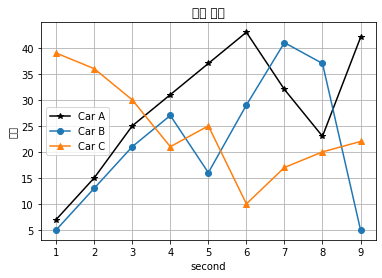

In [24]:
# 아래는 판다스의 메서드이지만 맷플롯립을 기반으로 쓰는 것입니다.
# `style` 파라미터의 인자는 맷플롯립에서 사용하는 선 스타일과 동일하게 쓰입니다.
# 다만 일반 맷플롯립과는 달리 `색 선 마커` 형식으로 아래처럼 붙여서 한번에 지정합니다. 
speed_plot = df.plot(grid=True, style=['k-*', '-o', '-^'], title='초별 속도')
speed_plot.set_ylabel('속도')

image_file = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/초별 속도.png'
plt.savefig(image_file, dpi=400)

plt.show()

## **1.3. JSON**

### **1.3.1. 파일 읽기**

In [6]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/read_json_sample.json'
df_json = pd.read_json(file_path)
df_json

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


### **1.3.2. 파일 저장하기**

In [7]:
json_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_json = pd.DataFrame(json_data)
df_json

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


In [8]:
df_json.set_index('name', inplace=True)
df_json

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [9]:
df_json.to_json('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_json.json')

## **1.4. 웹**

### **1.4.1. 표 가져오기**

`read_html()` 메서드는 HTML 웹 페이지의 `<table>` 태그에서 표 형식 데이터를 데이터프레임으로 변환합니다. 이 표 데이터를 파싱(parsing) 하려면 HTML 웹 페이지 주소를 따옴표 안에 입력합니다. 아래에서 예시하겠습니다.

In [10]:
url = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/sample.html'
tables_html = pd.read_html(url)
# `read_html()` 메서드로 데이터프레임을 출력하면
# 여러 데이터프레임이 리스트에 담겨서 출력됩니다.
tables_html

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

표 개수를 확인하겠습니다.

In [11]:
len(tables_html)

2

두 개의 표를 출력하겠습니다.

In [12]:
print(tables_html[0])
print()
print(tables_html[1])

   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9

         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


이번에는 두 개의 표를 반복(iteration)하면서 출력하겠습니다.

In [13]:
for i in range(len(tables_html)):
    print(f'{i+1}번째 데이터프레임')
    print(tables_html[i])
    print()

1번째 데이터프레임
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9

2번째 데이터프레임
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True



이제 2번째 데이터프레임에 행 인덱스를 'name' 열로 지정하겠습니다.

In [14]:
df_html = tables_html[1]
df_html.set_index(['name'], inplace=True)
print(df_html)

            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


### **1.4.2. 웹 스크래핑 하기**

`BeautifulSoup`와 같은 웹 스크래핑 도구로 수집한 데이터를 데이터프레임으로 정리할 수 있습니다. 스크래핑한 내용을 리스트, 딕셔너리 등으로 정리하고 `DataFrame()` 메서드에 전달하면 데이터프레임으로 변환됩니다(보강 예정입니다).

In [15]:
from bs4 import BeautifulSoup
import requests
import re

In [16]:
url = 'https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds'
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')
rows = soup.select('div > ul > li')

In [17]:
# 딕셔너리에 정리하기 위해 빈 딕셔너리를 만듭니다.
etfs = {}
for row in rows:

    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)

        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass

print(etfs)
print()

df_etfs = pd.DataFrame(etfs)
df_etfs

{'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'], 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'], 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'], 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'], 'SPY': ['NYSE Arca', 'SPDR S&P 500'], 'VOO': ['NYSE Arca', 'Vanguard S&P 500'], 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'], 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'], 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'], 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'], 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF'], 'IWB': ['NYSE Arca', 'iShares Russell 1000 Index'], 'PKW': ['NYSE Arca', 'PowerShares Buyback Achievers'], 'PRF': ['NYSE Arca', 'PowerShares FTSE RAFI US 1000'], 'SPLV': ['NYSE Arca', 'PowerShares S&P 500 Low Volatility'], 'SCHX': ['NYSE Arca', 'Schwab US Large-Cap ETF'], 'SCHD': ['NYSE Arca', 'Schwab US Dividend Equity ETF'], 'FNDX': ['NYSE Arca', 'Schwab Fundamental U.S. Large Company Index ETF'], 'SDY': ['NYSE Arca', 'SPDR S&P Divi

,DIA,RSP,IOO,IVV,SPY,VOO,IWM,OEF,CVY,RPG,RPV,IWB,PKW,PRF,SPLV,SCHX,SCHD,FNDX,SDY,VV,MGC,VONE,VIG,VYM,DTN,DLN,MDY,DVY,IWR,IJH,PDP,SCHM,IVOO,VO,VXF,DON,IWC,IJR,SCHA,FNDA,...,ICSH,IEIL,IEIS,IELG,IESM,NEAR,BABZ,DI,FORX,ILB,LDUR,MUNI,SMMU,CHNA,LALT,PHDG,PSR,ONEF,GAL,INKM,RLY,SYE,SYG,SYV,SRLN,ULST,ALD,AUNZ,BZF,CCX,CEW,CRDT,CYB,ELD,EMCB,EU,ICB,RRF,USDU,WDTI
0,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,...,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca
1,"DIAMONDS Trust, Series 1",Guggenheim S&P 500 Equal Weight,iShares S&P Global 100 Index,iShares S&P 500 Index,SPDR S&P 500,Vanguard S&P 500,iShares Russell 2000 Index,iShares S&P 100 Index,Guggenheim Multi-Asset Income,Guggenheim S&P 500 Pure Growth ETF,Guggenheim S&P 500 Pure Value ETF,iShares Russell 1000 Index,PowerShares Buyback Achievers,PowerShares FTSE RAFI US 1000,PowerShares S&P 500 Low Volatility,Schwab US Large-Cap ETF,Schwab US Dividend Equity ETF,Schwab Fundamental U.S. Large Company Index ETF,SPDR S&P Dividend ETF,Vanguard Large-Cap,Vanguard Mega-Cap 300,Vanguard Russell 1000,Vanguard Dividend Appreciation,Vanguard High Dividend Yield,WisdomTree Dividend ex-Financials,WisdomTree LargeCap Dividend,MidCap SPDR,iShares Select Dividend,iShares Russell Midcap Index,iShares S&P MidCap 400 Index,PowerShares DWA Mom Port,Schwab US Mid-Cap,Vanguard S&P Mid-Cap 400,Vanguard Mid-Cap,Vanguard Extended Market,WisdomTree MidCap Dividend ETF,iShares Micro-Cap,iShares S&P SmallCap 600 Index,Schwab US Small-Cap ETF,Schwab Fundamental U.S. Small Company Index ETF,...,iShares Liquidity Income ETF,iShares Enhanced International Large-Cap ETF,iShares Enhanced International Small-Cap ETF,iShares Enhanced U.S. Large-Cap ETF,iShares Enhanced U.S. Small-Cap ETF,iShares Short Maturity Bond ETF,PIMCO Build America Bond Strategy,PIMCO Diversified Income ETF,PIMCO Foreign Currency Strategy ETF,PIMCO Global Advantage Inflation-Linked Bond S...,PIMCO Low Duration ETF,PIMCO Intermediate Muni Bond Strategy ETF,PIMCO Short Term Muni Bond Strategy ETF,PowerShares China-A Share Portfolio,PowerShares Multi-Strategy Alternative Portfolio,S&P 500 Downside Hedged Portfolio,Active U.S. Real Estate Fund ETF,Russell Equity ETF,SPDR SSgA Global Allocation,SPDR SSgA Income Allocation,SPDR SSgA Multi-Asset Real Return,SPDR MFS Systematic Core Equity ETF,SPDR MFS Systematic Growth Equity ETF,SPDR MFS Systematic Value Equity ETF,SPDR Blackstone/GSO Senior Loan ETF,SPDR SSgA Ultra Short Term Bond ETF,WisdomTree Asia Local Debt,WisdomTree Australia & New Zealand Debt Fund,WisdomTree Dreyfus Brazilian Real Fund,WisdomTree Commodity Currency,WisdomTree Dreyfus Emerging Currency,WisdomTree Strategic Corporate Bond Fund,WisdomTree Dreyfus Chinese Yuan,WisdomTree Emerging Markets Local Debts Fund,WisdomTree Emerging Markets Corporate Bond Fund,WisdomTree Euro Debt Fund,WisdomTree Dreyfus Indian Rupee,WisdomTree Global Real Return,WisdomTree Bloomberg U.S. Dollar Bullish Fund,WisdomTree Managed Futures Strategy Fund


딕셔너리 키는 열명이고, ETF 거래 코드인 `etf_ticker`는 데이터프레임의 열명입니다. 리스트는 열 데이터입니다. 열 개수 378개는 ETF 펀드 데이터 378개를 데이터프레임으로 변환한 것입니다.

### **1.4.3. API로 데이터 가져오기**